Problem Statment = 'Analyzing the Big_Mart Data and predicting the Item_outlet_Sales using various  paramenters'

1."we hypothesize that there is a dependence between Item_outlet_Sales and Item_Identifier."
2.'we hypothesize that there is a dependence between Item_outlet_Sales and Item_MRP.'
3.'we hypothesize that there is a dependence between Item_outlet_Sales and Outlet_Size.'
4.'we hypothesize that there is a dependence between Item_outlet_Sales and Item_Visibility.'

In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
df = pd.read_csv('/content/Train.csv')
df.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7904,FDR35,12.5,Low Fat,0.020740,Breads,198.9742,OUT045,2002,NaN,Tier 2,Supermarket Type1,995.371
3341,FDL12,NaN,Regular,0.212963,Baking Goods,59.5220,OUT019,1985,Small,Tier 1,Grocery Store,299.610


In [425]:
df.shape

(8523, 12)

In [426]:
df_test = pd.read_csv('/content/Test.csv')
df_test.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3188,FDY51,12.5,Low Fat,0.081299,Meat,219.0798,OUT045,2002,NaN,Tier 2,Supermarket Type1
1968,FDR08,18.7,Low Fat,0.037592,Fruits and Vegetables,112.6886,OUT013,1987,High,Tier 3,Supermarket Type1


In [427]:
df_test.shape

(5681, 11)

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [429]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [430]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [431]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [432]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [433]:
df.describe(include=['O']).T

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


## Univariate analysis

### Categorical Featrue analysis

#### Item_Fat_Content

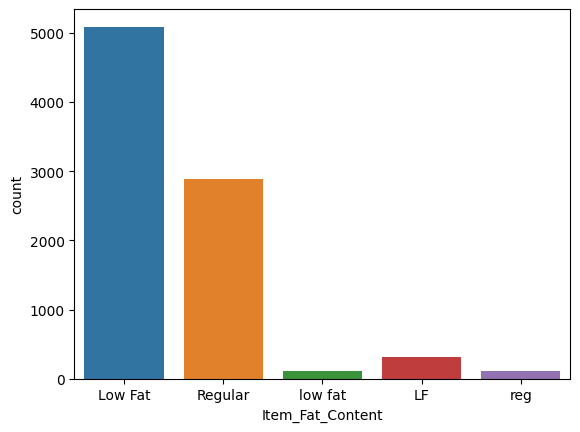

In [434]:
sns.countplot(data=df, x='Item_Fat_Content')
plt.show()

In [435]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

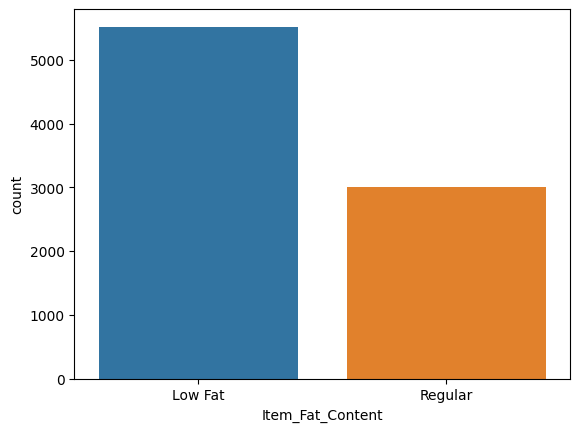

In [436]:
sns.countplot(data=df, x='Item_Fat_Content')
plt.show()

#### Item_Type

In [437]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

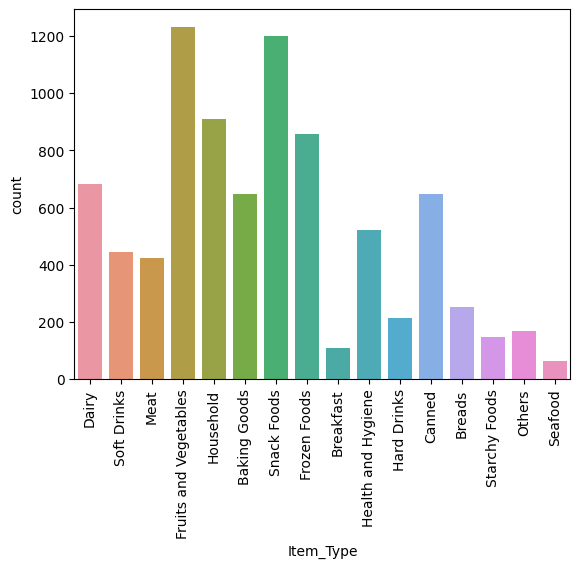

In [438]:
sns.countplot(data=df, x='Item_Type')
plt.xticks(rotation=90)
plt.show()

#### Outlet_Size

In [439]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

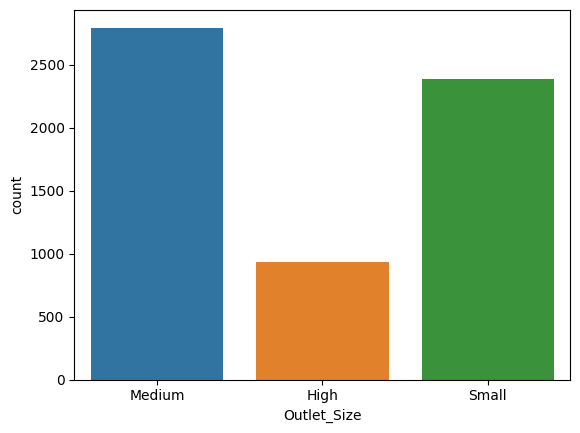

In [440]:
sns.countplot(data=df, x='Outlet_Size')
plt.show()

#### Outlet_Location_Type

In [441]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

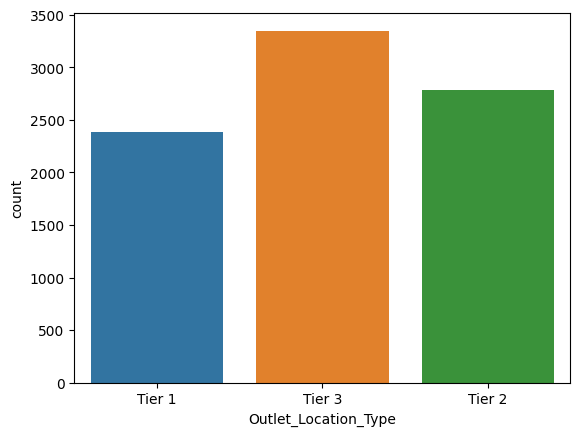

In [442]:
sns.countplot(data=df, x='Outlet_Location_Type')
plt.show()

#### Outlet_Type

In [443]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

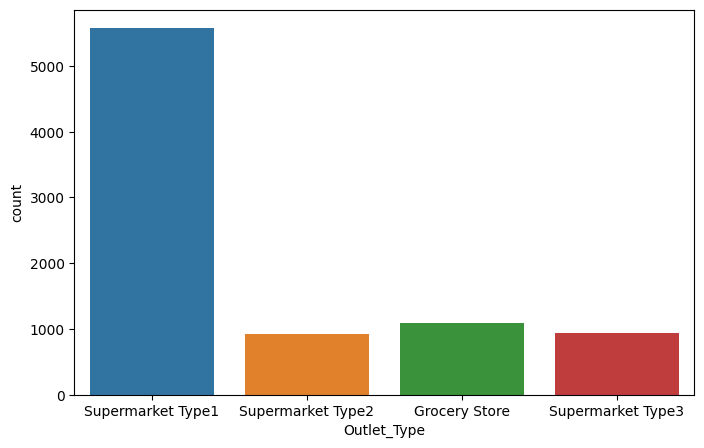

In [444]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Outlet_Type')
plt.show()

### Numerical Features Analysis

#### Item_Identifier

In [445]:
df['Item_Identifier'].nunique()

1559

#### Item_Weight

In [446]:
df['Item_Weight'].isnull().sum()

1463

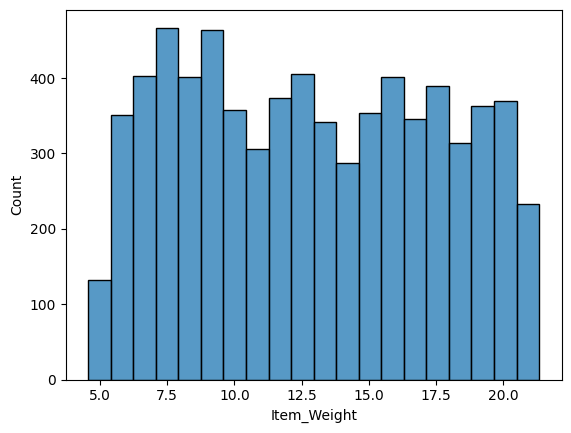

In [447]:
sns.histplot(df['Item_Weight'])
plt.show()

In [448]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### Item_Visibility

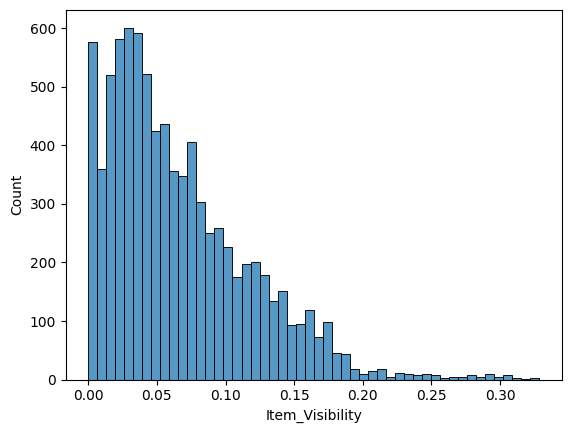

In [449]:
sns.histplot(df['Item_Visibility'])
plt.show()

In [450]:
df.groupby(by='Outlet_Identifier')['Item_Visibility'].sum()

Outlet_Identifier
OUT010    56.308832
OUT013    55.879859
OUT017    56.834646
OUT018    56.621454
OUT019    57.257041
OUT027    54.804764
OUT035    56.974873
OUT045    56.180780
OUT046    56.231875
OUT049    56.549156
Name: Item_Visibility, dtype: float64

In [451]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Item_Outlet_Sales

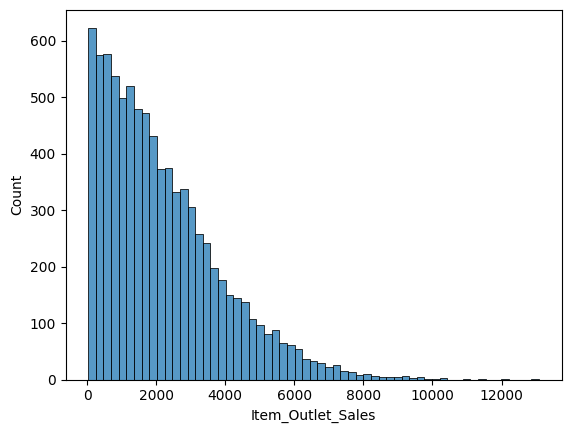

In [452]:
sns.histplot(df['Item_Outlet_Sales'])
plt.show()

## Bivariate Analysis

### Categorical - Numerical Analysis

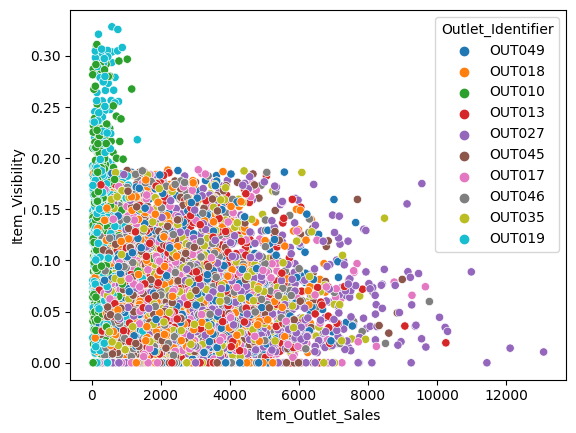

In [454]:
# Scatter plot between 'Item_Outlet_Sales' and 'Item_Visibility'
sns.scatterplot(x=df['Item_Outlet_Sales'], y=df['Item_Visibility'], hue=df['Outlet_Identifier'])
plt.show()

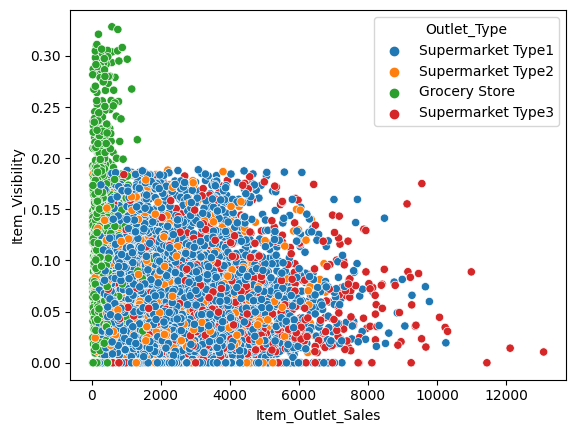

In [455]:
# Scatter plot between 'Item_Outlet_Sales' and 'Item_Visibility'
sns.scatterplot(x=df['Item_Outlet_Sales'], y=df['Item_Visibility'], hue=df['Outlet_Type'])
plt.show()

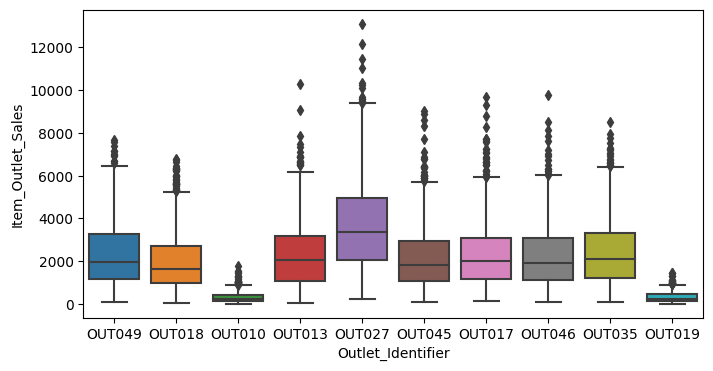

In [456]:
# Box plot between Outlet_Identifier and Item_Outlet_Sales
plt.figure(figsize=(8, 4))
sns.boxplot(x = df['Outlet_Identifier'], y=df['Item_Outlet_Sales'])
plt.show()

## Missing Value Treatment

#### Item_Weight

In [457]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [458]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [459]:
df[df['Item_Weight'].isnull()].sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4105,FDF05,NaN,Low Fat,0.026741,Frozen Foods,261.2910,OUT027,1985,Medium,Tier 3,Supermarket Type3,5522.8110
458,DRB48,NaN,Regular,0.024733,Soft Drinks,40.2822,OUT027,1985,Medium,Tier 3,Supermarket Type3,1296.3126


In [460]:
df['Item_Weight'].mean()

12.857645184135976

In [461]:
df['Item_Weight'].median()

12.6

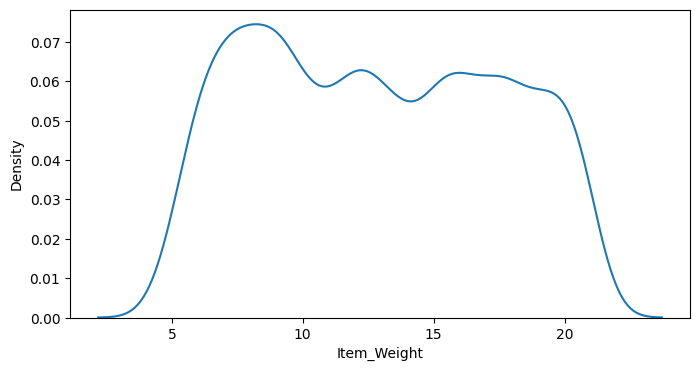

In [462]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Item_Weight'])
plt.show()

In [463]:
# Imputing the null values in the 'Item_Weight' column with the mean of 'Item_Weight'
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Here we have imputed the missing values with the mean of the item weight.

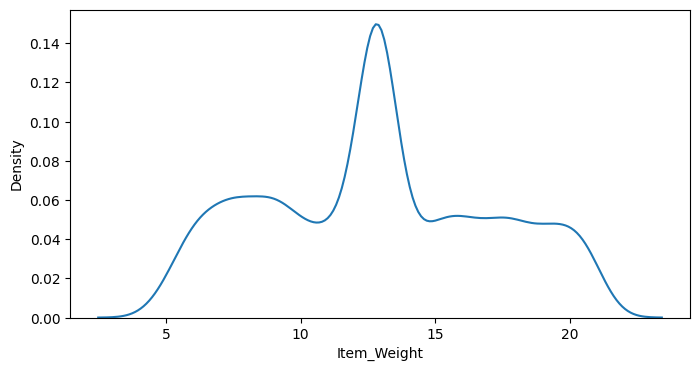

In [464]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Item_Weight'])
plt.show()

In [465]:
# Same goes for the test set as well
df_test['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Outlet_Size

In [466]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [467]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [468]:
df[df['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [469]:
df[df['Outlet_Identifier'] == 'OUT045']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440
...,...,...,...,...,...,...,...,...,...,...,...,...
8483,DRI11,8.260,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [470]:
df[df['Outlet_Size'].isnull()]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [471]:
df[df['Outlet_Type'] == 'Supermarket Type1']['Outlet_Size'].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64

In [472]:
df[df['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [ ]:
# Here we are imputing the missing values of the outlet_size with value 'small' .

In [473]:
df['Outlet_Size'].fillna('Small', inplace=True)
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Outlier Detection and Treatment

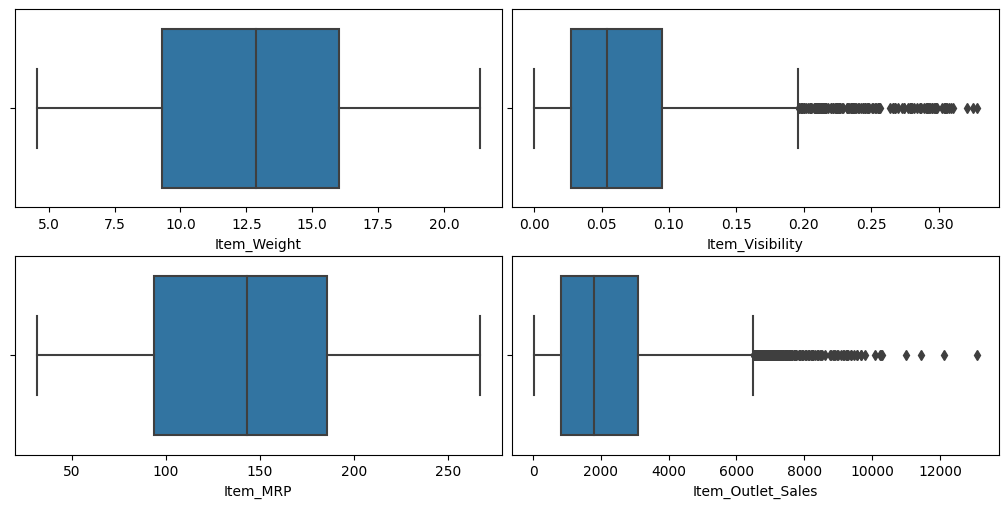

In [474]:
plt.figure(figsize= (10, 5))
plt.subplot(2, 2, 1)
sns.boxplot(x=df["Item_Weight"])

plt.subplot(2, 2, 2)
sns.boxplot(x=df["Item_Visibility"])

plt.subplot(2, 2, 3)
sns.boxplot(x=df["Item_MRP"])

plt.subplot(2, 2, 4)
sns.boxplot(x=df["Item_Outlet_Sales"])

plt.tight_layout(pad=0.4)

plt.show()

In [475]:
# Define a function called 'outliers' which returns a list of index of outliers
def outliers(df):
  for ft in df.columns:
    if((df[ft].dtypes) == 'float64'):
      q1 = df[ft].quantile(0.25)
      q3 = df[ft].quantile(0.75)
      iqr = q3 - q1

      lower_bound = q1 - (1.5 * iqr)
      upper_bound = q3 + (1.5 * iqr)

      df[ft] = np.where(df[ft] > upper_bound, upper_bound, np.where(df[ft] < lower_bound, lower_bound, df[ft]))

    else:
      df[ft] = df[ft]

  return df

In [476]:
df = outliers(df)

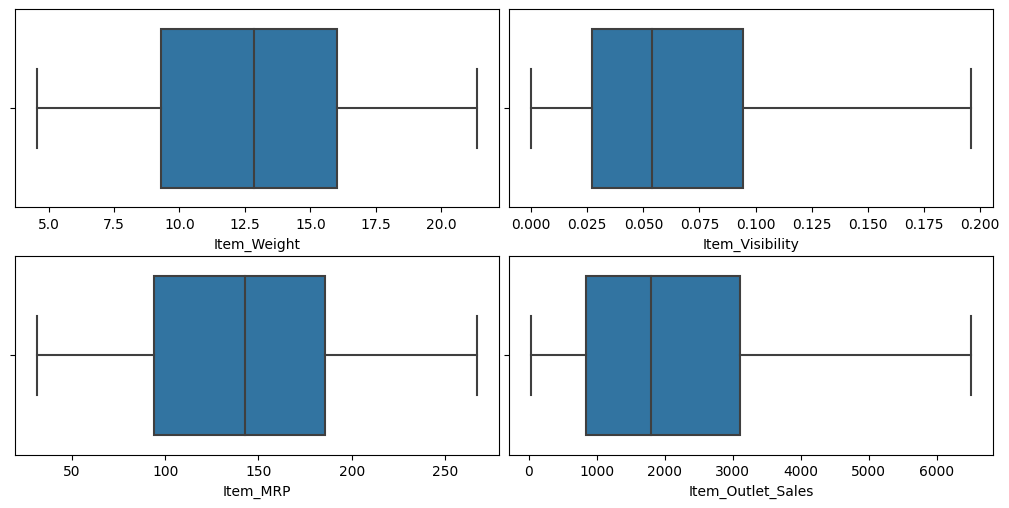

In [477]:
plt.figure(figsize= (10, 5))
plt.subplot(2, 2, 1)
sns.boxplot(x=df["Item_Weight"])

plt.subplot(2, 2, 2)
sns.boxplot(x=df["Item_Visibility"])

plt.subplot(2, 2, 3)
sns.boxplot(x=df["Item_MRP"])

plt.subplot(2, 2, 4)
sns.boxplot(x=df["Item_Outlet_Sales"])

plt.tight_layout(pad=0.4)

plt.show()

## Encoding categorical features

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [479]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [483]:
from category_encoders import TargetEncoder

target_enc = ['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in target_enc:
  TEncoder = TargetEncoder()
  df[col] = TEncoder.fit_transform(df[col],df["Item_Outlet_Sales"])
  df_test[col] = TEncoder.transform(df_test[col])

df.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5234,1996.775039,20.700000,2132.716277,0.026954,2234.782576,73.2354,2180.051014,2002,1856.496987,2309.590154,2303.714679,1504.708
7837,1991.095624,12.857645,2199.620803,0.020470,2181.264770,88.2540,3541.375602,1985,2628.060993,2233.239974,3541.375602,2510.066


## Multivariate Analysis

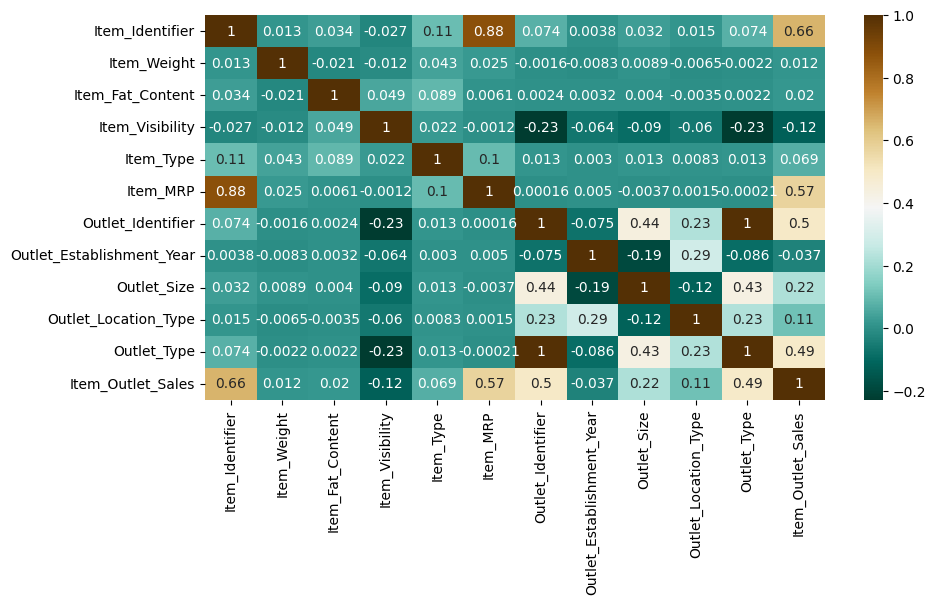

In [484]:
plt.figure(figsize=(10, 5))
# plt.figure(figsize=(24,15))
sns.heatmap(df.corr(),annot=True,cmap='BrBG_r')
plt.show()

## VIF

In [485]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = df
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Outlet_Establishment_Year,4942.29
2,Item_Fat_Content,4353.46
6,Outlet_Identifier,1450.65
10,Outlet_Type,1441.29
0,Item_Identifier,540.09
4,Item_Type,381.34
9,Outlet_Location_Type,164.43
8,Outlet_Size,50.27
5,Item_MRP,27.07
1,Item_Weight,10.29


## Splitting the dataset into train and test sets

In [486]:
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [487]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape

((6392, 11), (2131, 11), (6392,))

## Standardization

In [488]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

X_train_scaled

array([[ 0.88453659,  0.81916441, -0.7403206 , ...,  1.32985215,
         0.41331931, -0.21064161],
       [ 1.76110446,  0.55825754,  1.35076614, ...,  1.32985215,
         0.41331931, -0.21064161],
       [ 0.19708582, -0.12958785,  1.35076614, ...,  1.32985215,
        -1.59915999,  0.17352248],
       ...,
       [ 2.50527808,  1.11564949, -0.7403206 , ..., -0.84672605,
         0.83590438,  0.17352248],
       [-0.95031571,  1.76791667, -0.7403206 , ..., -0.84672605,
         0.83590438,  0.17352248],
       [-1.09498056,  0.81916441, -0.7403206 , ..., -0.84672605,
        -1.59915999,  0.17352248]])

In [489]:
# Checking for VIF after applying standardization
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = X_train_scaled
vif['Features'] = df.drop(columns=['Item_Outlet_Sales'], axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_t, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Outlet_Identifier,180.49
10,Outlet_Type,179.55
0,Item_Identifier,4.36
5,Item_MRP,4.33
8,Outlet_Size,1.35
9,Outlet_Location_Type,1.22
7,Outlet_Establishment_Year,1.18
3,Item_Visibility,1.07
2,Item_Fat_Content,1.02
4,Item_Type,1.02


In [490]:
X = df.drop(columns=['Item_Outlet_Sales', 'Outlet_Type'], axis=1)
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape

((6392, 10), (2131, 10), (6392,))

In [491]:
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

X_train

array([[ 0.88453659,  0.81916441, -0.7403206 , ...,  1.32784893,
         1.32985215,  0.41331931],
       [ 1.76110446,  0.55825754,  1.35076614, ...,  1.32784893,
         1.32985215,  0.41331931],
       [ 0.19708582, -0.12958785,  1.35076614, ...,  0.13618724,
         1.32985215, -1.59915999],
       ...,
       [ 2.50527808,  1.11564949, -0.7403206 , ...,  0.49368575,
        -0.84672605,  0.83590438],
       [-0.95031571,  1.76791667, -0.7403206 , ...,  1.0895166 ,
        -0.84672605,  0.83590438],
       [-1.09498056,  0.81916441, -0.7403206 , ..., -0.10214509,
        -0.84672605, -1.59915999]])

In [492]:
vif = pd.DataFrame()
X_t = X_train
vif['Features'] = df.drop(columns=['Item_Outlet_Sales', 'Outlet_Type'], axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_t, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Item_Identifier,4.36
5,Item_MRP,4.33
6,Outlet_Identifier,1.47
8,Outlet_Size,1.33
9,Outlet_Location_Type,1.22
7,Outlet_Establishment_Year,1.14
3,Item_Visibility,1.07
2,Item_Fat_Content,1.02
4,Item_Type,1.02
1,Item_Weight,1.00


In [493]:
# We will drop the 'Outlet_Type' column for the test set as well
df_test.drop(columns=['Outlet_Type'], axis=1, inplace=True)

## Linear Regression

In [494]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [495]:
y_pred = lr.predict(X_test)

In [496]:
from sklearn.metrics import r2_score, mean_squared_error

print('RMSE Score: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE Score:  915184.7141235548
R2 Score:  0.4589046547965423


In [497]:
r2 = r2_score(y_test, y_pred)

# Calculate the number of predictors (features)
p = X_train.shape[1]

# Calculate the adjusted R-squared score
n = len(y)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.634746551764325


# Ridge

In [515]:
from sklearn.linear_model import Ridge
# Ridge Regression
model = Ridge(alpha=0.5)  # You can adjust the alpha parameter for regularization

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


print('RMSE Score: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE Score:  915184.6215426248
R2 Score:  0.4589034390721044


In [516]:
r2 = r2_score(y_test, y_pred)

# Calculate the number of predictors (features)
p = X_train.shape[1]

# Calculate the adjusted R-squared score
n = len(y)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.6347465887137007


# Lasso

In [520]:
from sklearn.linear_model import Lasso
# Ridge Regression
model = Lasso(alpha=0.5)  # You can adjust the alpha parameter for regularization

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


print('RMSE Score: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE Score:  915110.3998186073
R2 Score:  0.45837205761454913


In [521]:
r2 = r2_score(y_test, y_pred)

# Calculate the number of predictors (features)
p = X_train.shape[1]

# Calculate the adjusted R-squared score
n = len(y)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.634776210865615


## Random Forest

In [498]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [499]:
y_pred = rf.predict(X_test)

In [500]:
print('RMSE Score: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE Score:  994881.7339078751
R2 Score:  0.46226891522457636


In [501]:
r2 = r2_score(y_test, y_pred)

# Calculate the number of predictors (features)
p = X_train.shape[1]

# Calculate the adjusted R-squared score
n = len(y)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.6029391899923275


## XG Boost

In [502]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [503]:
print('RMSE Score: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE Score:  1047469.3425253669
R2 Score:  0.45836808521939


In [504]:
r2 = r2_score(y_test, y_pred)

# Calculate the number of predictors (features)
p = X_train.shape[1]

# Calculate the adjusted R-squared score
n = len(y)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.5819512898607113


- Out of all the models we are getting the best r2 score in Linear Regression

# Predictions

In [505]:
df_test.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type
1524,2013.302705,12.857645,2132.716277,0.084542,1945.50613,107.128,3541.375602,1985,2628.060993,2233.239974
1750,2381.415273,12.150000,2156.313016,0.000000,1926.13978,254.004,2341.687686,1999,2628.060993,1869.637079


In [507]:
# Prediciton with Linear Regression
y_pred = lr.predict(df_test.values)
y_pred

array([3525889.6895444 , 3470819.72133742, 2494106.55818615, ...,
       3447850.01324541, 3684842.19467386, 3447865.92268755])

In [508]:
# Prediction with Random Forest
y_pred = rf.predict(df_test.values)
y_pred

array([4193.105201, 4311.144883, 4359.049193, ..., 4298.101861,
       4193.105201, 4359.049193])

In [509]:
# Prediciton with XGBoost
y_pred = xgb_model.predict(df_test.values)
y_pred

array([2085.5251, 2217.0127, 2233.246 , ..., 2173.8774, 1924.8496,
       2233.246 ], dtype=float32)

# Conclusions

- Linear regression is having the best performance among all the models we applied with 0.6347 r2-score.
- XGBoost and Random Forest could be further tuned for better performance.